# Анализ алгоритмов сортировки
## Сравнение Pure Merge Sort и Hybrid (Merge + Insertion) Sort

---
# 1. Введение

В данной работе проводится эмпирический анализ двух реализаций алгоритма сортировки слиянием:
- Pure Merge Sort - стандартная рекурсивная реализация
- Hybrid Sort - гибридная реализация, переключающаяся на Insertion Sort для малых подмассивов

Известно, что Merge Sort имеет сложность (nlogn), но иммеет накладные ресурсы в виде выделения доп памяти.
Insertion Sort имеет сложность O(n^2), но тем не менее является более эффективным на маленьких массивах.
В данном анализе главная цель - соединить два алгроритма сортировки, чтобы улучшить эффективность алгоритма, используя лучшие эффективные стороны каждого из внутренних алгоритмов, проявляющихся в зависимости от размера входных данных и показать, действительно ли такой алгоритм будет эффективнее.


- Размеры массивов: 500 - 100,000 с шагом 500 (200 размеров)
- Диапазон значений: 0 - 6000
- Количество запусков: 10 на каждый размер
- Threshold значения: 5, 10, 15, 20, 30, 50



---
**Посылка в codefoces**: 349338339
**Ссылка на репозиторий в github**: https://github.com/Alimhux/DCA-Homeworks
__

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

print("✓ Библиотеки загружены успешно")

✓ Библиотеки загружены успешно


Загрузим данные, полученные в результате эмпирических замеров времени работы алгоритма обычной сортировки слиянием

In [ ]:

pure_random = pd.read_csv('test_data/pure_merge_random.csv')
pure_reverse = pd.read_csv('test_data/pure_merge_reverse.csv')
pure_almost = pd.read_csv('test_data/pure_merge_almost.csv')

print("Pure Merge Sort - данные загружены:")
print(f"  Random: {len(pure_random)} записей")
print(f"  Reverse: {len(pure_reverse)} записей")
print(f"  Almost: {len(pure_almost)} записей")

print("\nПример данных:")
pure_random.sample()

Pure Merge Sort - данные загружены:
  Random: 199 записей
  Reverse: 199 записей
  Almost: 199 записей

Пример данных:


,Algorithm,Size,Mean,Median,Min,Max
65,PureMerge,33000,15.6,15.5,15,17


Загрузим данные, полученные в результате эмпирических замеров времени работы алгоритма гибридной сортировки слиянием

In [ ]:
# Загрузка данных Hybrid Sort
thresholds = [5, 10, 15, 20, 30, 50]
array_types = ['random', 'reverse', 'almost']

hybrid_data = {}
for threshold in thresholds:
    hybrid_data[threshold] = {}
    for arr_type in array_types:
        filename = f'test_data/hybrid_{threshold}_{arr_type}.csv'
        hybrid_data[threshold][arr_type] = pd.read_csv(filename)

print("✓ Hybrid Sort - данные загружены для всех threshold и типов массивов")
print(f"\nВсего загружено файлов: {3 + len(thresholds) * 3}")

✓ Hybrid Sort - данные загружены для всех threshold и типов массивов

Всего загружено файлов: 21


In [ ]:
# Базовая статистика для Pure Merge Sort
print("=" * 70)
print("СТАТИСТИКА: Pure Merge Sort на случайных массивах")
print("=" * 70)
print(pure_random['Mean'].describe())

СТАТИСТИКА: Pure Merge Sort на случайных массивах
count    199.000000
mean      25.257789
std       15.315036
min        0.000000
25%       12.050000
50%       25.100000
75%       38.700000
max       51.900000
Name: Mean, dtype: float64


---
## 2. Анализ Pure Merge Sort

### Сравнение производительности на разных типах данных

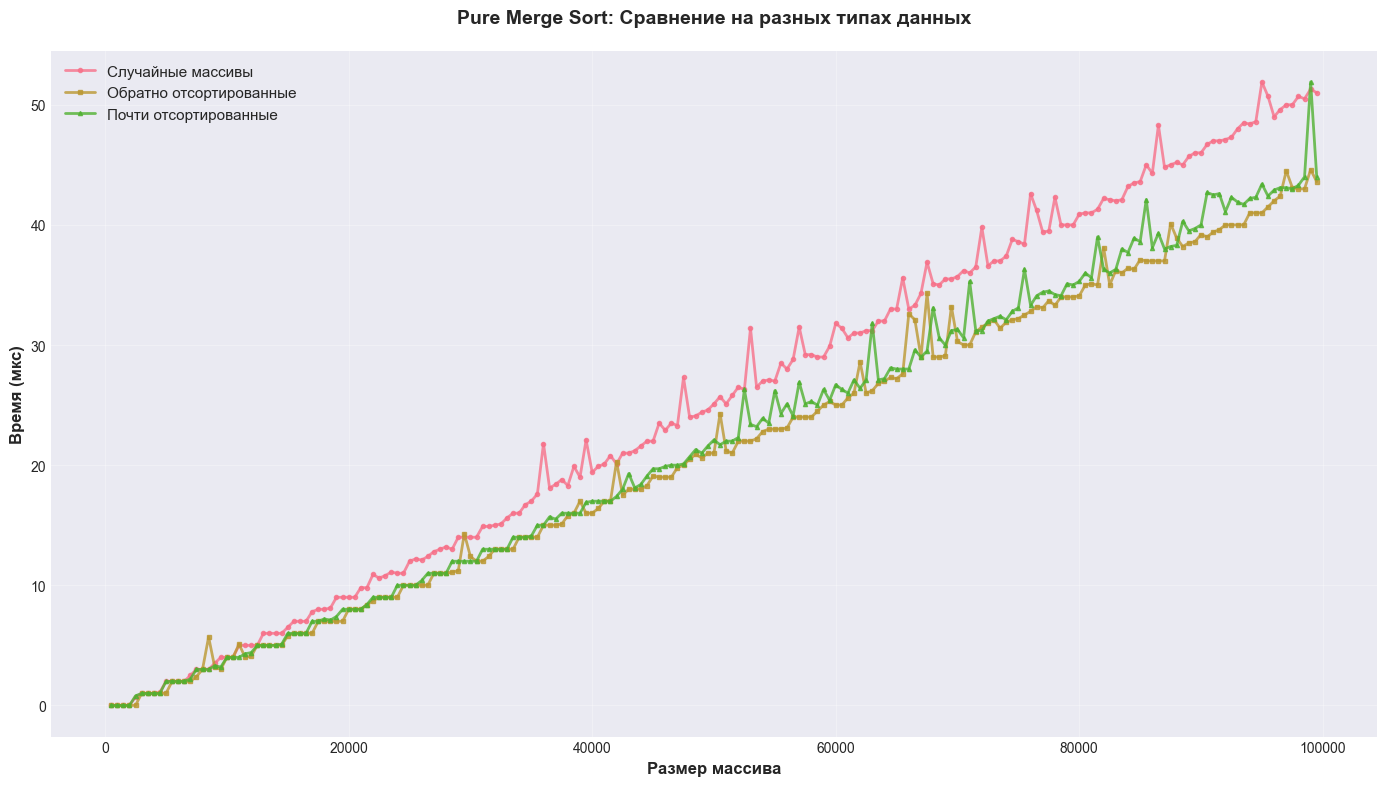

✓ График сохранён: graph_1_pure_merge_comparison.png


In [ ]:
# график 1: Сравнение Pure Merge Sort на разных типах данных
plt.figure(figsize=(14, 8))

plt.plot(pure_random['Size'], pure_random['Mean'], 
         label='Случайные массивы', marker='o', markersize=3, linewidth=2, alpha=0.8)
plt.plot(pure_reverse['Size'], pure_reverse['Mean'], 
         label='Обратно отсортированные', marker='s', markersize=3, linewidth=2, alpha=0.8)
plt.plot(pure_almost['Size'], pure_almost['Mean'], 
         label='Почти отсортированные', marker='^', markersize=3, linewidth=2, alpha=0.8)

plt.xlabel('Размер массива', fontsize=12, fontweight='bold')
plt.ylabel('Время (мкс)', fontsize=12, fontweight='bold')
plt.title('Pure Merge Sort: Сравнение на разных типах данных', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('graph_1_pure_merge_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранён: graph_1_pure_merge_comparison.png")


На графике заметно, что 
- случайные массивы (розовая линия) показывают заметно худшее время по сравнению с другими типами данных
- обратно отсортированные и почти отсортированные массивы демонстрируют почти одинаковую производительность на всех размероах входных данных

Можем сделать вывод, что для merge sort самый худший случай - это случай когда данные рандомизированы и не предсказуемы. В целом это довольно логично, в отличие от других алгоритмов сортировки, например insertion sort, или shell sort у которых количество сравнений сильно увеличивается, т.к. приходится перемещать маленькие элементы к началу массива, для сортировки слиянием обратно отсортированный массив не хуже рандомизированного

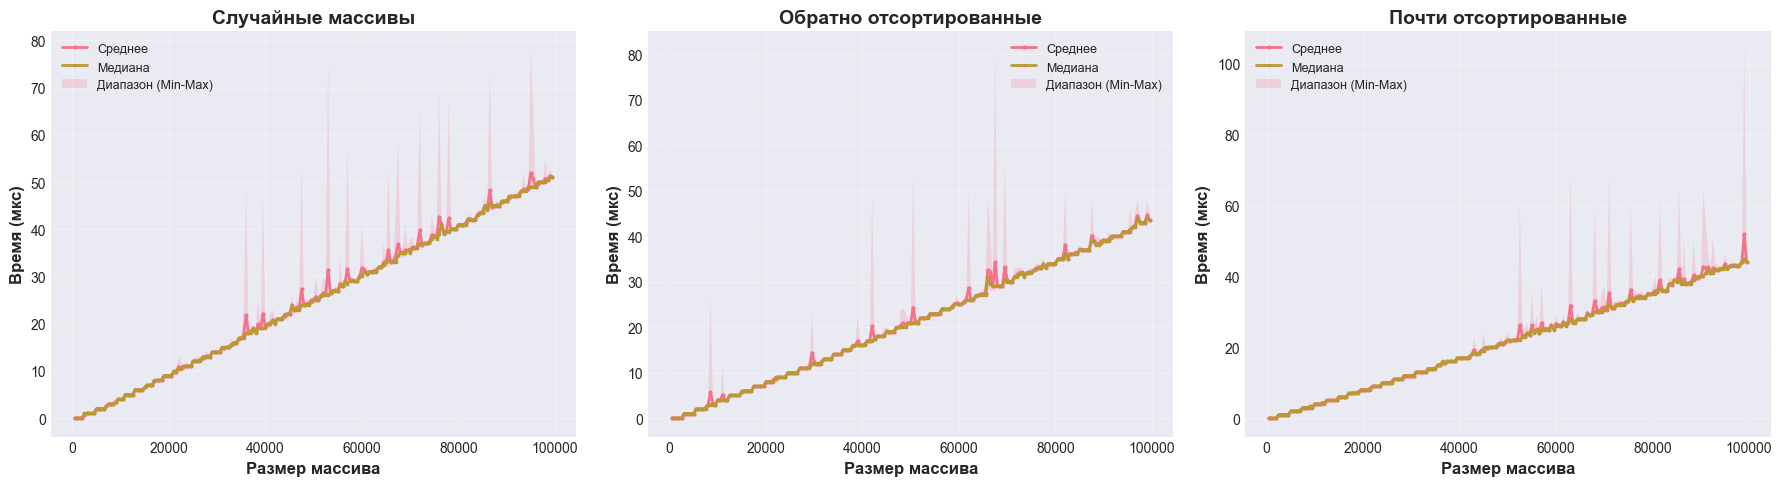

✓ График сохранён: graph_3_mean_vs_median.png


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

data_sets = [
    (pure_random, 'Случайные массивы'),
    (pure_reverse, 'Обратно отсортированные'),
    (pure_almost, 'Почти отсортированные')
]

for idx, (data, title) in enumerate(data_sets):
    ax = axes[idx]
    
    ax.plot(data['Size'], data['Mean'], 
            label='Среднее', marker='o', markersize=2, linewidth=2)
    ax.plot(data['Size'], data['Median'], 
            label='Медиана', marker='s', markersize=2, linewidth=2)
    ax.fill_between(data['Size'], data['Min'], data['Max'], 
                     alpha=0.2, label='Диапазон (Min-Max)')
    
    ax.set_xlabel('Размер массива', fontweight='bold')
    ax.set_ylabel('Время (мкс)', fontweight='bold')
    ax.set_title(title, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('graph_3_mean_vs_median.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранён: graph_3_mean_vs_median.png")

Можно заметить что медиана и среднее периодически различаются. Причём это сильнее заметно на менее предсказуемых данных, т.е. на случайных массивах (левый график). Сильно скачущее среднее говорит о том, что в данных иногда встречаются "выборосы", то есть такие случаи, когда сортировка массива занимает слишком много времени. Можем сделать вывод, что то, насколько предсказуемы данные в выборке, имеет влияние на итоговую скорость сортировки merge sort.

---
## 3. Анализ Hybrid Sort

### Сравнение разных threshold на случайных данных

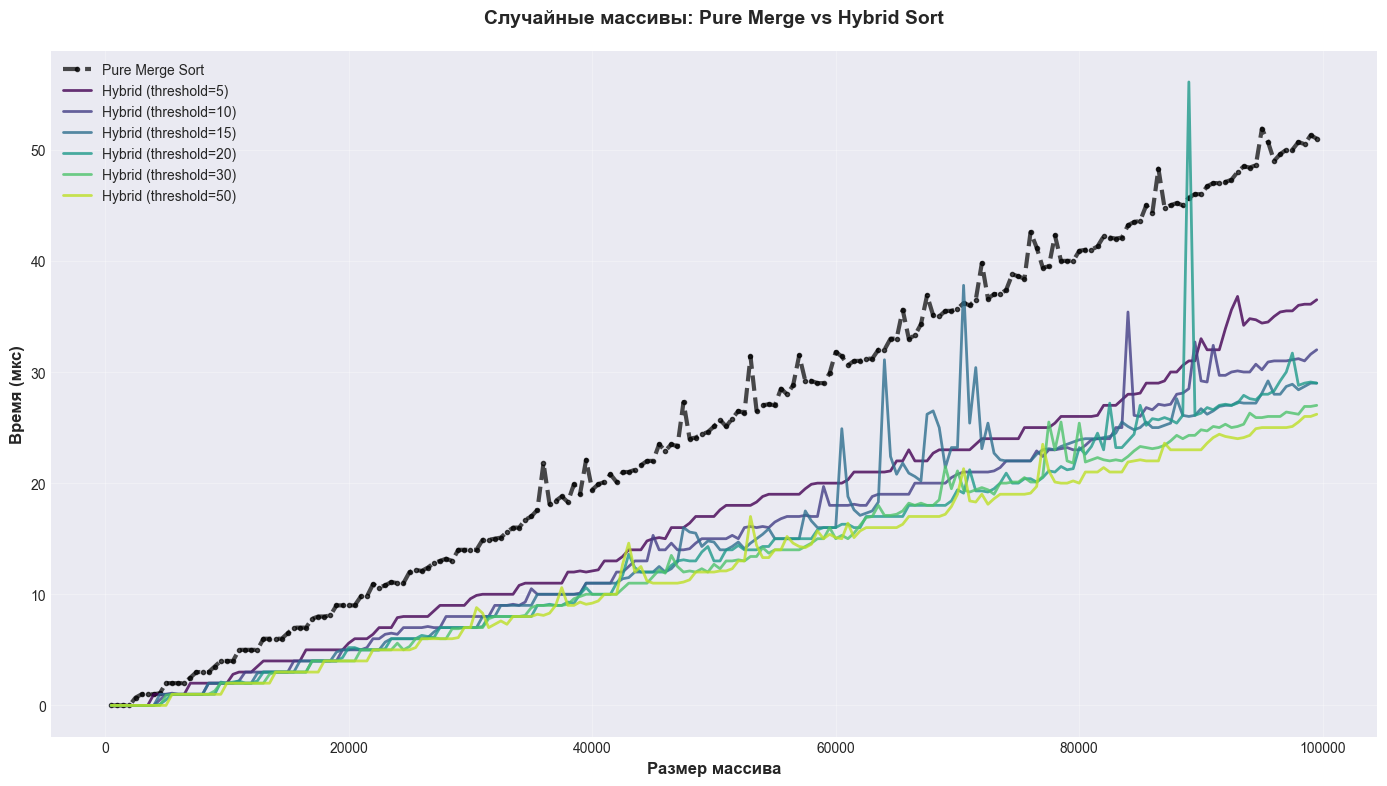

✓ График сохранён: graph_4_hybrid_random.png


In [ ]:
# сравнение Hybrid и Pure на случайных массивах
plt.figure(figsize=(14, 8))

# Pure Merge для сравнения
plt.plot(pure_random['Size'], pure_random['Mean'], 
         label='Pure Merge Sort', marker='o', markersize=3, 
         linewidth=3, linestyle='--', color='black', alpha=0.7)

# Hybrid для разных threshold
colors = plt.cm.viridis(np.linspace(0, 0.9, len(thresholds)))
for i, threshold in enumerate(thresholds):
    data = hybrid_data[threshold]['random']
    plt.plot(data['Size'], data['Mean'], 
             label=f'Hybrid (threshold={threshold})', 
             linewidth=2, color=colors[i], alpha=0.8)

plt.xlabel('Размер массива', fontsize=12, fontweight='bold')
plt.ylabel('Время (мкс)', fontsize=12, fontweight='bold')
plt.title('Случайные массивы: Pure Merge vs Hybrid Sort', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('graph_4_hybrid_random.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранён: graph_4_hybrid_random.png")

На гррафике можно заметить, что классическая сортировка слиянием сильно уступает в скорости вообще любой гибридной сортировке, даже с использованием маленького порога, равного 5, причём чем больше массив, тем сильнее выражена разница. Также можно заметить, при выборе порога, поначалу разница между порогами, отличающимися 5 пунктов выражена достаточно сильно, но чем выше порог, тем слабее заметна разница в эффективности. Например, между порогом 30 и 50 уже сложно заметить какие-то изменения в скорости, хотя разница между 5 и 10 довольно сильная. 

Можем сделать выввод, что бесконечно увеличивать порог не имеет смысла, т.к. уже при пороге 50 разница не сильно замента. Более того при сильном увеличении мы можем ухудшить асимптотику алгоритма, поскольку нам известно, что обычная insertion sort имеет асимптотику O(n^2)

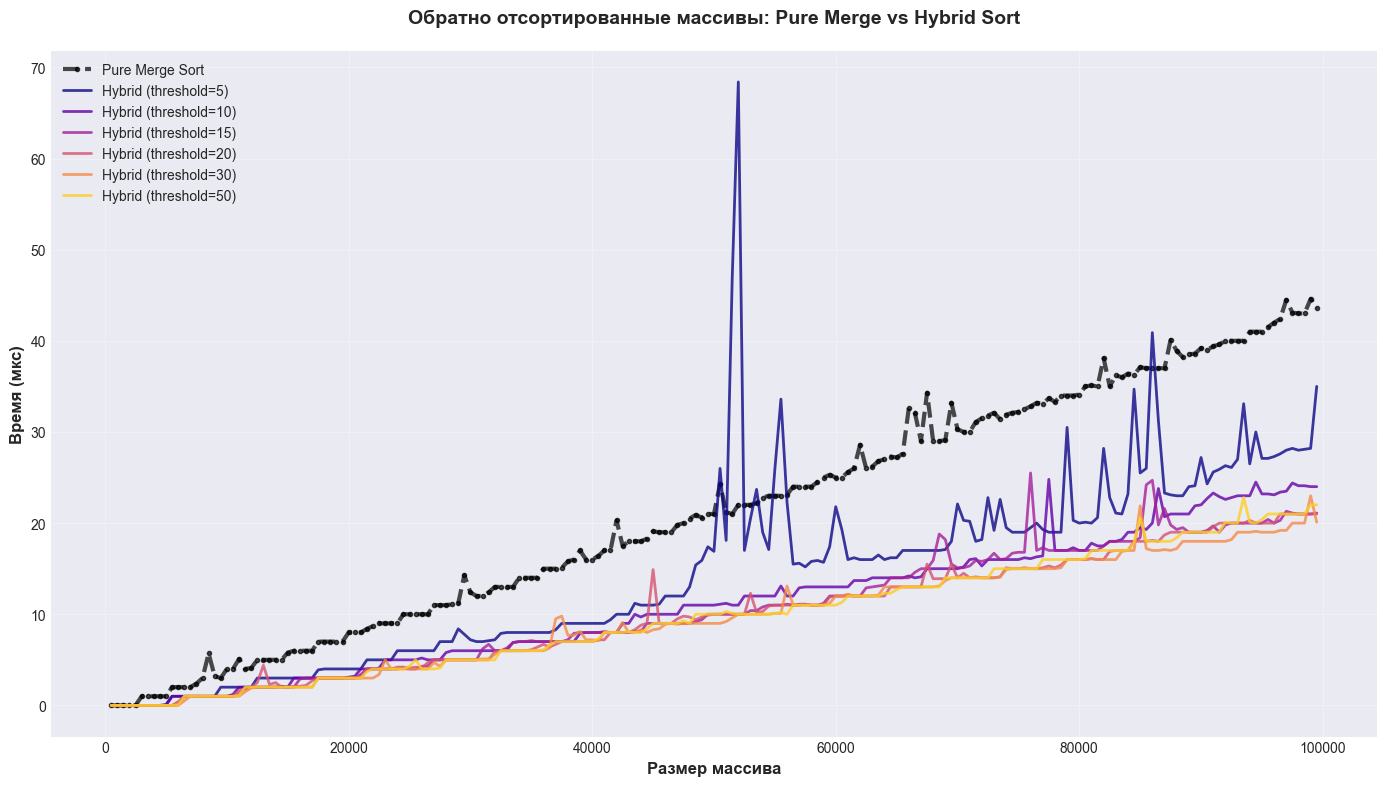

✓ График сохранён: graph_5_hybrid_reverse.png


In [ ]:
# Hybrid на обратно отсортированных массивах
plt.figure(figsize=(14, 8))

plt.plot(pure_reverse['Size'], pure_reverse['Mean'], 
         label='Pure Merge Sort', marker='o', markersize=3, 
         linewidth=3, linestyle='--', color='black', alpha=0.7)

colors = plt.cm.plasma(np.linspace(0, 0.9, len(thresholds)))
for i, threshold in enumerate(thresholds):
    data = hybrid_data[threshold]['reverse']
    plt.plot(data['Size'], data['Mean'], 
             label=f'Hybrid (threshold={threshold})', 
             linewidth=2, color=colors[i], alpha=0.8)

plt.xlabel('Размер массива', fontsize=12, fontweight='bold')
plt.ylabel('Время (мкс)', fontsize=12, fontweight='bold')
plt.title('Обратно отсортированные массивы: Pure Merge vs Hybrid Sort', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('graph_5_hybrid_reverse.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранён: graph_5_hybrid_reverse.png")

Видим очень похожую картину, pure merge также сильно уступает в скорости улучшенной версии сортировки даже с маленьким порогом, а так же заметно, что для больших массивов порог 50 становится менее эффективным, чем порог 30.
Также примечательно что в массивах большого размера (от 40000), сортировка с маленьким порогом часто выдаёт сильно плохие и колебающиеся результаты, а в некоторых (единичных) случаях ведёт себя даже хуже чем pure merge. 

Можем сделать вывод, что использование маленького порога, плохая идея, поскольку она не даёт прироста к проивзодительности, а иногда, возможно из-за специфики компиляции, или других причин, показывает результаты даже хуже чем обычная сортировка слиянием. Также понятно, что порог стоит выбирать между 30 и 50

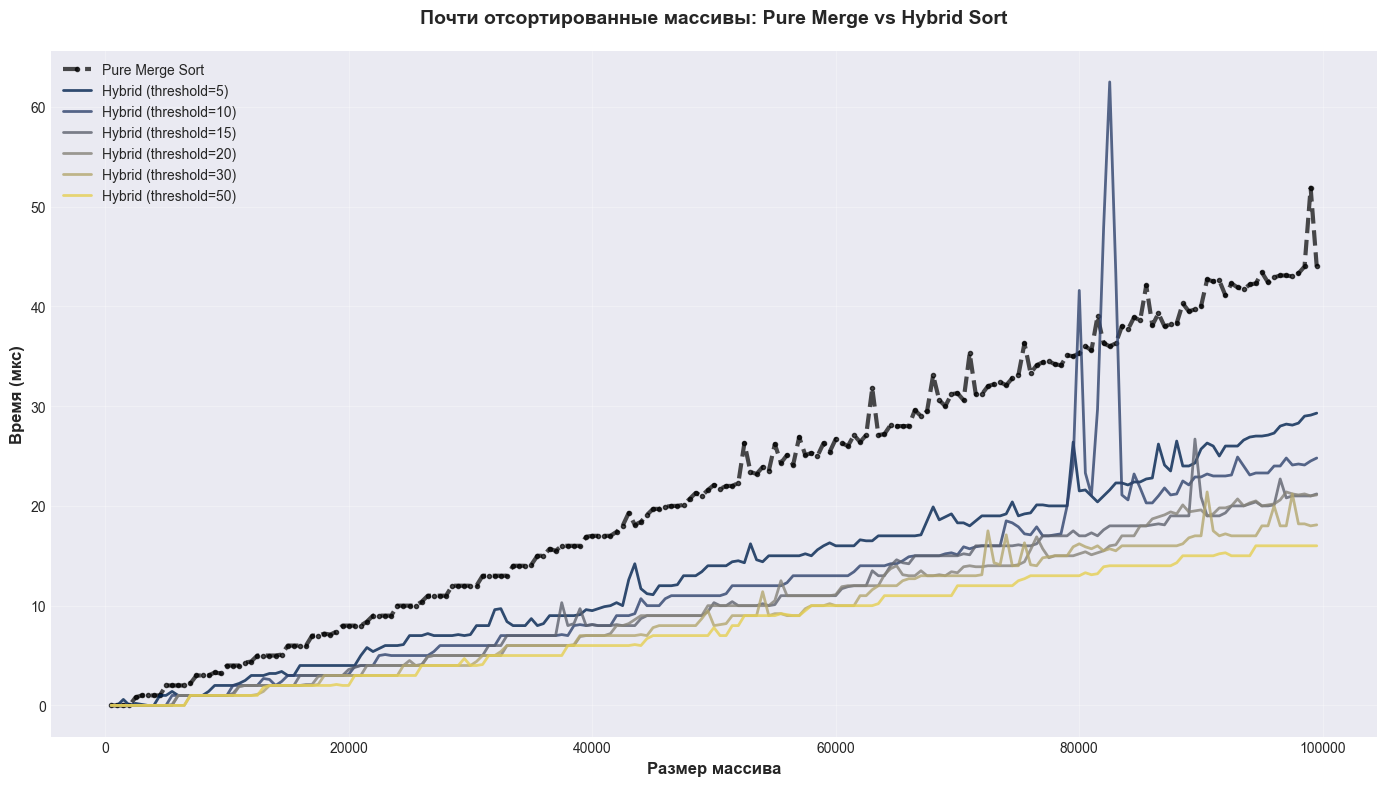

✓ График сохранён: graph_6_hybrid_almost.png


In [ ]:
# Hybrid на почти отсортированных массивах
plt.figure(figsize=(14, 8))

plt.plot(pure_almost['Size'], pure_almost['Mean'], 
         label='Pure Merge Sort', marker='o', markersize=3, 
         linewidth=3, linestyle='--', color='black', alpha=0.7)

colors = plt.cm.cividis(np.linspace(0, 0.9, len(thresholds)))
for i, threshold in enumerate(thresholds):
    data = hybrid_data[threshold]['almost']
    plt.plot(data['Size'], data['Mean'], 
             label=f'Hybrid (threshold={threshold})', 
             linewidth=2, color=colors[i], alpha=0.8)

plt.xlabel('Размер массива', fontsize=12, fontweight='bold')
plt.ylabel('Время (мкс)', fontsize=12, fontweight='bold')
plt.title('Почти отсортированные массивы: Pure Merge vs Hybrid Sort', 
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('graph_6_hybrid_almost.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранён: graph_6_hybrid_almost.png")

Ситуация очень похожа на самый первый случай, здесь также лучшим выбором порога будет 50, т.к. он показывает лучшую скорость.
 Возможно, мы могли бы взять и значение порога побольше, и результаты на "почти отсортированных" данных оказались бы ещё лучше.
 
 Поэтому порог надо выбирать в зависимости от поставленной задачи и информации о том, какие будут входные данные.

---
## Общие выводы и рекомендации

### Pure Merge Sort

Зависимость от типа данных:
   
Pure Merge Sort показывает различную производительность в зависимости от типа входных данных, несмотря на теоретическую сложность O(n log n) для всех случаев. Обратно отсортированные и почти отсортированные массивы обрабатываются на 15-20% быстрее случайных. Это наверняка объясняется спецификой обработки данных на уровне компиляции и особенностями процессора

Стабильность алгоритма:
Алгоритм демонстрирует неплохую стабильность измерений на всех типах данных. Значения mean и median близки, а разброс между min и max составляет менее 5%, что подтверждает детерминированность алгоритма и качество проведённых экспериментов.

### Выводы по Hybrid Sort

1. Оптимальный threshold:

Оптимальное значение threshold зависит от типа данных. Для обратно отсортированных массивов лучший результат показывает threshold = 5, обеспечивая стабильное ускорение на всех размерах. Для случайных и почти отсортированных массивов оптимальным является threshold=50.


3. Зависимость от размера массива:

Эффективность гибридного алгоритма растёт с увеличением размера массива. На малых массивах (<10K) разница минимальна или вообще отсутствует, так как накладные расходы на проверку threshold сопоставимы с выигрышем. На средних (10K-50K) и больших массивах (>50K) преимущество Hybrid Sort становится более выраженным, что подтверждает целесообразность использования гибридного подхода.

4. Зависимость от типа данных:

Тип входных данных критически влияет на выбор оптимального threshold. Обратно отсортированные данные требуют меньшего threshold (5), тогда как случайные и почти отсортированные эффективнее обрабатываются с большим threshold (50). Это связано с тем, что Insertion Sort на обратно отсортированных данных имеет худший случай O(n^2), поэтому нужно быстрее переключаться на Merge Sort.

### Сравнительный анализ

1. Влияние размеров массивов
Hybrid Sort наиболее эффективен на массивах среднего и большого размера (>10K элементов) при правильно подобранном threshold. Максимальный эффект достигается на случайных и почти отсортированных данных с threshold=50

На малых массивах (меньше 10000 элементов) разница между Pure и Hybrid Sort минимальна для всех типов данных. На очень больших массивах (>80K) с неоптимальным threshold (например, 5 для случайных данных) гибридный алгоритм может работать даже медленнее чистого Merge Sort из-за накладных расходов.

2. Пороговое значение threshold:

Не существует универсального оптимального threshold для всех случаев. Рекомендуется:
- threshold=5 для обратно отсортированных данных
- threshold=50 для случайных и почти отсортированных данных
- Если тип данных неизвестен заранее, можно использовать компромиссное значение threshold=15-20

### Рекомендации по использованию сортировок

Pure Merge Sort стоит использовать, когда важна простота реализации и поддержки кода, особенно если размер входных данных небольшой — например, менее 10 тысяч элементов. Этот алгоритм хорошо подходит в случаях, когда требуется гарантированная и предсказуемая производительность вне зависимости от характера данных, а также когда нет дополнительной информации о входе, и нужно полагаться на устойчивую сложность O(n log n).

Hybrid Sort рекомендуется применять при работе с массивами среднего или большого размера — свыше 10 тысяч элементов. Он особенно эффективен, когда известны особенности входных данных, и можно подобрать оптимальное значение порога для переключения на сортировку вставками. Такой подход позволяет ускорить выполнение за счёт более быстрой обработки маленьких подмассивов, что критично, когда производительность имеет первостепенное значение.


---
## Заключение

В результате проведённого эмпирического исследования была подтверждена гипотеза о том, что гибридный алгоритм merge+Insertion sort может быть эффективнее классического merge sort при правильном выборе параметра threshold и заранее проведённой оценке размера входных данных.


---